In [3]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv("C:/Users/ASUS/Desktop/AI&ML/Data_Set/Practice/ai_job_dataset.csv")

In [7]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [13]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [60]:
#Converting Date columns to date & time
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['posting_date']

0       2024-10-18
1       2024-11-20
2       2025-03-18
3       2024-12-23
4       2025-04-15
           ...    
14995   2025-02-06
14996   2024-10-16
14997   2024-03-19
14998   2024-03-22
14999   2024-07-18
Name: posting_date, Length: 15000, dtype: datetime64[ns]

In [62]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [64]:
#Creating a new feature: Days until Deadline
df['days_until_deadline'] = (df['application_deadline']-df['posting_date']).dt.days
df['days_until_deadline']

0        20
1        52
2        20
3        63
4        69
         ..
14995    47
14996    14
14997    44
14998    32
14999    23
Name: days_until_deadline, Length: 15000, dtype: int64

In [46]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,days_until_deadline
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,20
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,52
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,20
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,63
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,69


In [66]:
#Dropping irrelivant columns 
columns_to_drop = ['job_id', 'company_name']
df.drop(columns=columns_to_drop, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_title               15000 non-null  object        
 1   salary_usd              15000 non-null  int64         
 2   salary_currency         15000 non-null  object        
 3   experience_level        15000 non-null  object        
 4   employment_type         15000 non-null  object        
 5   company_location        15000 non-null  object        
 6   company_size            15000 non-null  object        
 7   employee_residence      15000 non-null  object        
 8   remote_ratio            15000 non-null  int64         
 9   required_skills         15000 non-null  object        
 10  education_required      15000 non-null  object        
 11  years_experience        15000 non-null  int64         
 12  industry                15000 non-null  object

In [68]:
#Handle Categorical value: Create dummies for relevant columns
categorical_cols = ['job_title', 'experience_level', 'employment_type','company_location','company_size','employee_residence','education_required','industry']
df=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

### EDA Part

In [71]:
df.describe()

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,job_description_length,benefits_score,days_until_deadline
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273,43.546200
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000,14.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000,29.000000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000,44.000000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000,59.000000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000,74.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,576.127083,1.450870,17.325134


<function matplotlib.pyplot.show(close=None, block=None)>

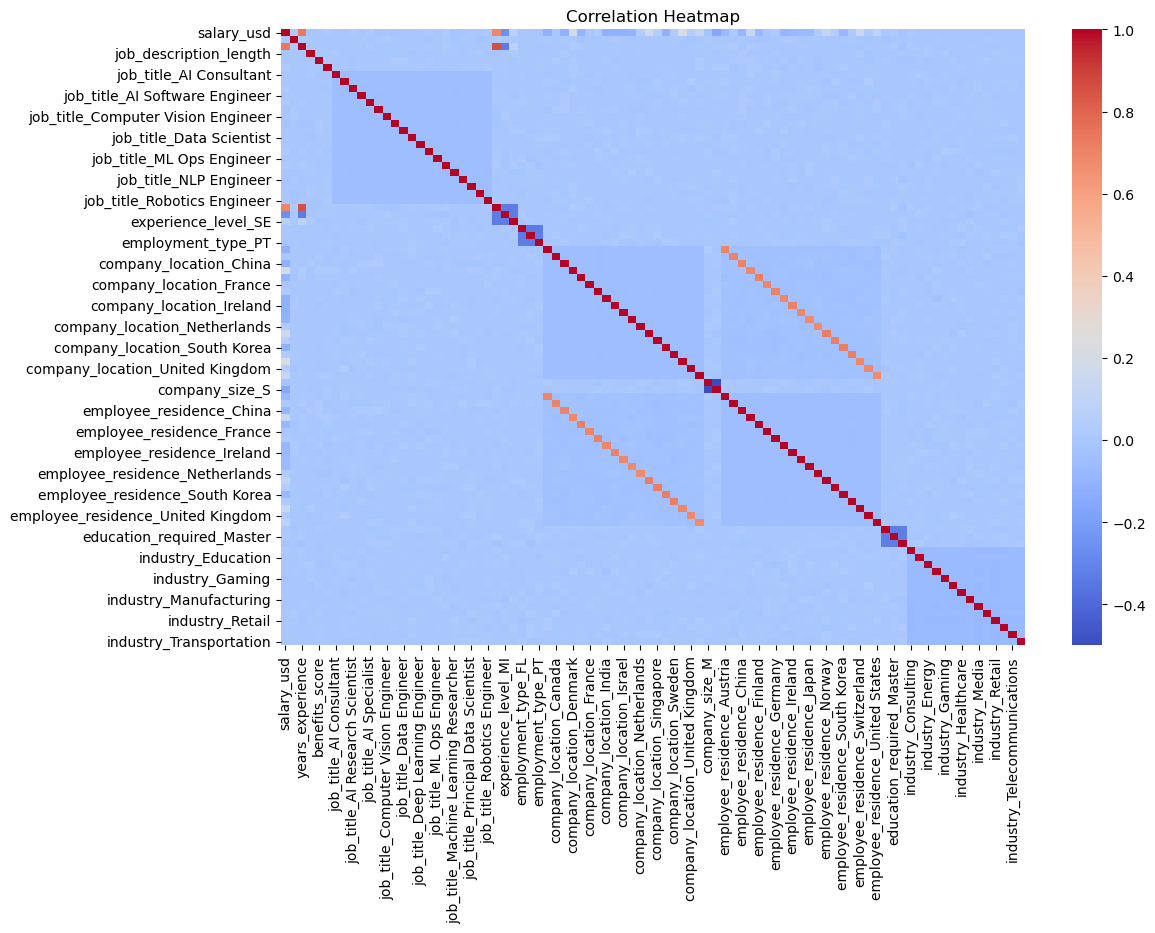

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

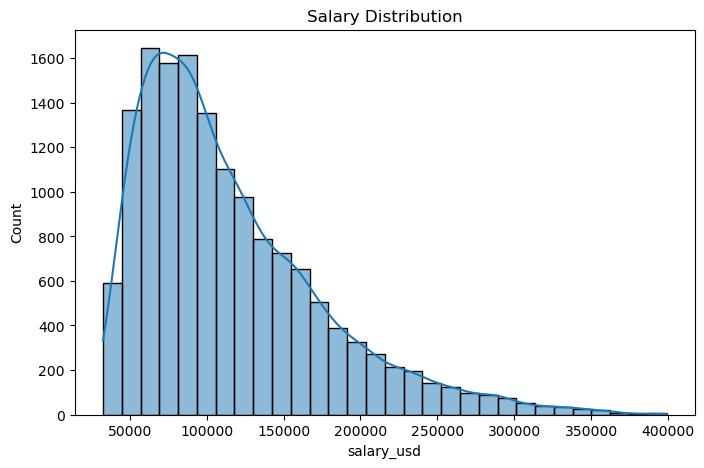

In [79]:
#Salary Distribution,
plt.figure(figsize=(8,5))
sns.histplot(df['salary_usd'],bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

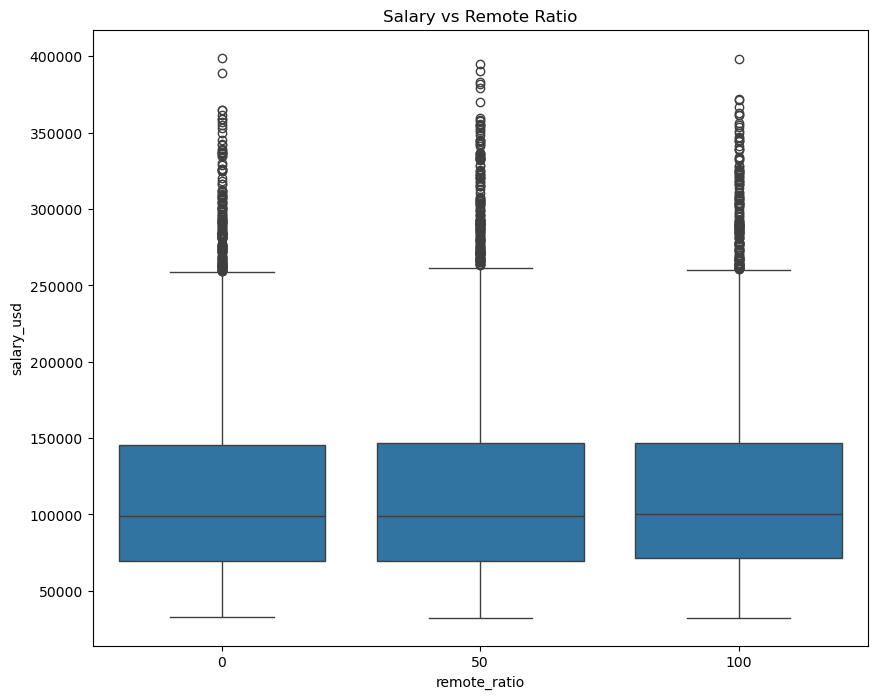

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(x='remote_ratio', y='salary_usd', data=df)
plt.title("Salary vs Remote Ratio")
plt.show()

### Feature Selection & Model Building

In [94]:
X = df.drop(columns=['salary_usd', 'salary_currency', 'required_skills', 'posting_date','application_deadline'])
y = df['salary_usd']

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
y_pred = model.predict(X_test)

### Model Evaluation

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [113]:
print(f"MAE:{mae:.2f}")
print(f"MSE:{mse:.2f}")
print(f"R2 Score:{r2:.2f}")

MAE:15671.95
MSE:486093081.67
R2 Score:0.87


### Make prediction

In [122]:
example_input = X_test[0].reshape(1,-1)
example_prediction = model.predict(example_input)
print(f"\nPredicted Salary(USD):{example_prediction[0]:.2f}")


Predicted Salary(USD):144626.92
